# Leukemia remission generalized linear regression

Let's examine how various predictor variables affect the response variable (whether leukemia remission occured) REMISS.

## 1. Packages and load data

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# import statmodels for regression
import statsmodels.api as sm

# set plot & size defaults if needed
from matplotlib import rcParams

# load data
leukemia = pd.read_csv('data/leukemiaremission.txt', sep = '\t')
leukemia['REMISS'] = leukemia.iloc[:, 0]
leukemia.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


In [2]:
# dataframe info
leukemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REMISS  27 non-null     int64  
 1   CELL    27 non-null     float64
 2   SMEAR   27 non-null     float64
 3   INFIL   27 non-null     float64
 4   LI      27 non-null     float64
 5   BLAST   27 non-null     float64
 6   TEMP    27 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.6 KB


## 2. Generalized linear regression

Setup:

- 27 patients
- REMISS = remission occured (1) or not (0)
- CELL = cellularity of the marrow clot section
- SMEAR = smear differential percentage of blasts
- INFIL = percentage of oabsolute maarrow leukemia cell infiltrate
- LI = percentage labeling index of the bone marrow leukemia cells
- BLAST = absolute number of blasts in the peripheral blood
- TEMP = highest temperature prior to start of treatment

### 2.1 Pair plots

The function below is a helper function taken from a [Constructor Learning](https://learning.constructor.org/) course.

In [3]:
# helper function to annotate the pair plots with correlation coefficients
def corr_annot(x, y, ax=None, **kws):
    # annotate plot with correlation coefficient
    r, _ = st.pearsonr(x, y)
    ax = ax or plt.gca()
    fontsizes = {range(0,21):"medium", range(21,51):'large', range(51,81):'x-large', range(90,101):'xx-large'}

    # if r > 0 display corr
    if r > 0:
        font_size = [fontsize for bound,fontsize in fontsizes.items() if round(abs(r), 1)*100 in bound][0]
        ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes, fontsize = font_size)

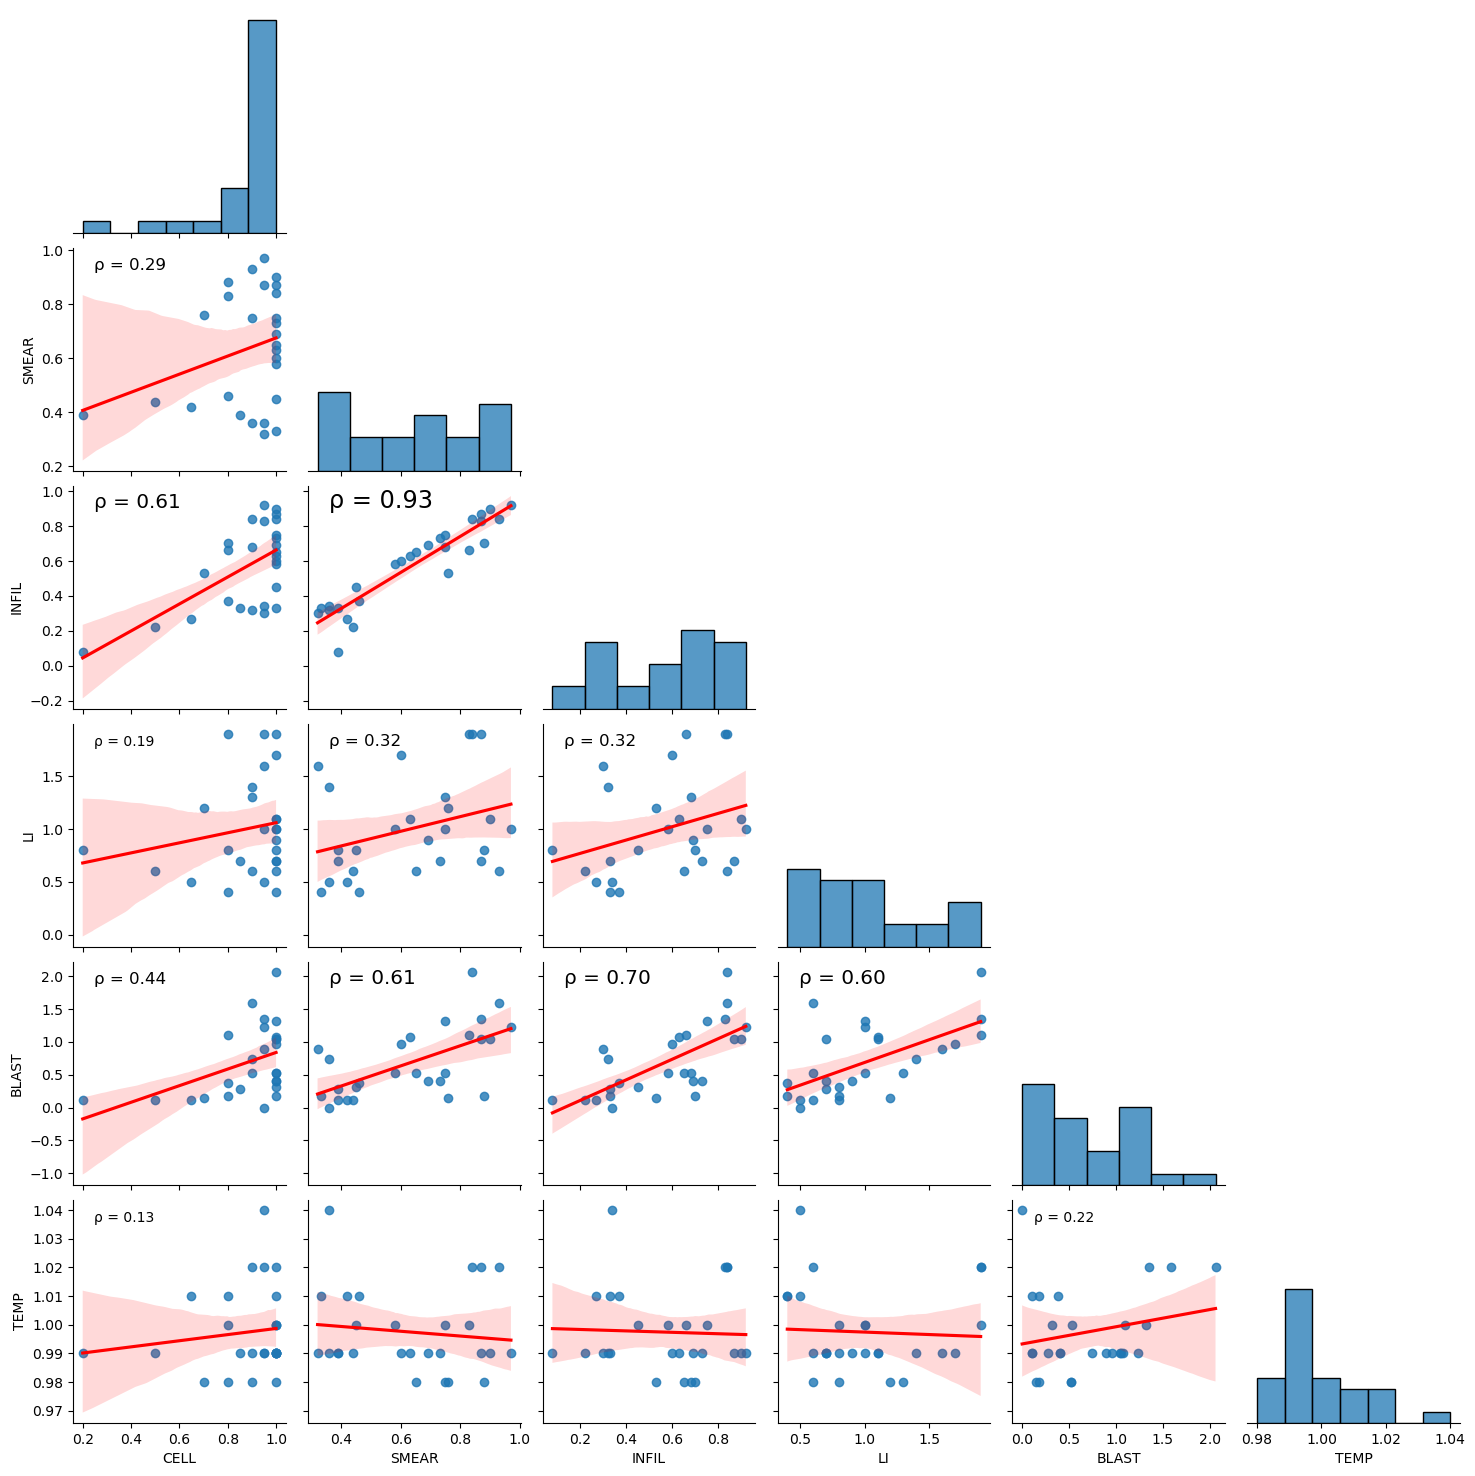

In [4]:
# check explanatory variables

# drop dependant variable REMISS and crate pairplot
g = sns.pairplot(leukemia.drop(columns = 'REMISS'),
                 kind = 'reg',
                 corner = True,
                 plot_kws = {'line_kws': {'color': 'red'}}
                 );

g.map_lower(corr_annot);

### 2.2 Run regression model (GLM)

In [5]:
# response variable
y = leukemia['REMISS']

# explanatory variables
X = leukemia.drop(columns = 'REMISS')

# fit GLM
leu_model_all = sm.GLM(
    y,
    sm.add_constant(X),
    family=sm.families.Binomial(
        link=sm.genmod.families.links.logit()
        )
    ).fit()

# print output
print(leu_model_all.summary())

# print AIC to evaluate model (lower is better)
print("AIC:", leu_model_all.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                            GLM   Df Residuals:                       20
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.797
Date:                Thu, 11 May 2023   Deviance:                       21.594
Time:                        11:15:45   Pearson chi2:                     19.1
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3770
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2581     74.965      0.857      0.3

In [6]:
# alternative method with sm.logit
leu_logit_model = sm.Logit(y,
    sm.add_constant(X)).fit()

print(leu_logit_model.summary())
print("AIC:", leu_logit_model.aic)

Optimization terminated successfully.
         Current function value: 0.399886
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            6
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.3718
Time:                        11:16:35   Log-Likelihood:                -10.797
converged:                       True   LL-Null:                       -17.186
Covariance Type:            nonrobust   LLR p-value:                   0.04670
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2581     74.965      0.857      0.391     -82.670     211.187
CELL          30.8301     52

In [7]:
# all features have P-value > 0.05 -> statistically not significant

# BLAST has very little effect as P-value is 0.996 -> remove feature
# corr(INFIL, SMEAR) = 0.93 -> very high correlation -> remove INFIL

### 2.3 GLM with dropped features

In [8]:
# response variable
y = leukemia['REMISS']

# explanatory variables
X = leukemia.drop(columns = ['REMISS', 'BLAST', 'INFIL'])

# fit GLM
leu_model_1 = sm.GLM(
    y,
    sm.add_constant(X),
    family=sm.families.Binomial(
        link=sm.genmod.families.links.logit()
        )
    ).fit()

# print output
print(leu_model_1.summary())

# print AIC to evaluate model (lower is better)
print("AIC:", leu_model_1.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                            GLM   Df Residuals:                       22
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.880
Date:                Thu, 11 May 2023   Deviance:                       21.761
Time:                        11:21:23   Pearson chi2:                     18.8
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3732
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.1261     66.348      1.193      0.2

In [9]:
# only LI has a P-value < 0.05 -> statistically significant
# let's keep TEMP and CELL as the p-value is still quite small

In [10]:
# explanatory variables
X = leukemia[['CELL', 'LI', 'TEMP']]

# fit GLM
leu_model_2 = sm.GLM(
    y,
    sm.add_constant(X),
    family=sm.families.Binomial(
        link=sm.genmod.families.links.logit()
        )
    ).fit()

# print output
print(leu_model_2.summary())

# print AIC to evaluate model (lower is better)
print("AIC:", leu_model_2.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.939
Date:                Thu, 11 May 2023   Deviance:                       21.878
Time:                        11:22:51   Pearson chi2:                     20.0
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3704
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.8901     62.819      1.192      0.2

In [11]:
# dropping non-relevant not statisticaly significant features raised the AIC

### 2.4 Estimated odds for leukemia remission (LI = 0.9)